<a href="https://colab.research.google.com/github/nguyencong1227/Neural-networks-and-deep-learning/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip

--2022-04-28 10:13:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘sentiment labelled sentences.zip’

sentiment labelled  100%[===================>]  82.21K  --.-KB/s    in 0.06s   

2022-04-28 10:13:05 (1.41 MB/s) - ‘sentiment labelled sentences.zip’ saved [84188/84188]



In [ ]:
!unzip sentences.zip

Archive:  sentences.zip
   creating: sentiment labelled sentences/
  inflating: sentiment labelled sentences/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/sentiment labelled sentences/
  inflating: __MACOSX/sentiment labelled sentences/._.DS_Store  
  inflating: sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/imdb_labelled.txt  
  inflating: __MACOSX/sentiment labelled sentences/._imdb_labelled.txt  
  inflating: sentiment labelled sentences/readme.txt  
  inflating: __MACOSX/sentiment labelled sentences/._readme.txt  
  inflating: sentiment labelled sentences/yelp_labelled.txt  
  inflating: __MACOSX/._sentiment labelled sentences  


In [ ]:
X = [] # input text
y = [] # label

f = open(file='a/amazon_cells_labelled.txt', mode='r')
for line in f.readlines():
  line = line.strip()
  line = line.split("\t")
  y.append(int(line[-1]))
  X.append(line[0].strip())
f.close()

f = open('a/yelp_labelled.txt', 'r')
for line in f.readlines():
  line = line.strip()
  line = line.split("\t")
  y.append(int(line[-1]))
  X.append(line[0].strip())
f.close()

f = open('a/imdb_labelled.txt', 'r')
for line in f.readlines():
  line = line.strip()
  line = line.split("\t")
  y.append(int(line[-1]))
  X.append(line[0].strip())
f.close()


print(X[0])
print(len(X))
print(y[0])
print(len(y))


So there is no way for me to plug it in here in the US unless I go by a converter.
3000
0
3000


So there is no way for me to plug it in here in the US unless I go by a converter.
3000 3000


(array([1500.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1500.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

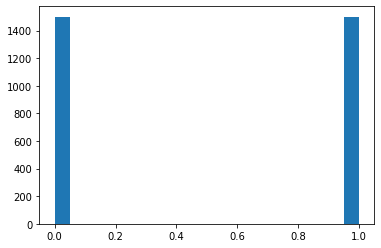

In [ ]:
from matplotlib import pyplot as plt
print(X[0])
print(len(X), len(y))
plt.hist(y, bins=20)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X)

X_seq_train = tokenizer.texts_to_sequences(X_train)
X_seq_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_seq_train[0])
print(tokenizer.sequences_to_texts([[432, 47]]))
print(X_train[0])

[543, 49, 23, 4, 158, 314, 41, 27, 21, 88, 76, 21, 559, 12]
['meal really']
Obviously they have a terrible customer service, so you get what you pay for.


In [ ]:
for i in X_seq_train[0]:
   print(f"{i} -----> {tokenizer.index_word[i]}")

543 -----> obviously
49 -----> they
23 -----> have
4 -----> a
158 -----> terrible
314 -----> customer
41 -----> service
27 -----> so
21 -----> you
88 -----> get
76 -----> what
21 -----> you
559 -----> pay
12 -----> for


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = max([len(t) for t in X_seq_train] + [len(t) for t in X_seq_test])
print(max_length)
X_pad_train = pad_sequences(sequences=X_seq_train, 
                              maxlen=max_length, 
                              padding='post')

print(X_pad_train.shape)

X_pad_test = pad_sequences(sequences=X_seq_test, 
                              maxlen=max_length,     
                              padding='post')
print(X_pad_test.shape)

59
(2400, 59)
(600, 59)


In [ ]:
X_pad_train[1]

array([  67,    1,   28,  169,  692,    7, 1681,  315, 1682, 1233,   60,
        662,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0], dtype=int32)

In [ ]:
# ML: X_pad ->  sentiment 
from tensorflow.keras.layers import Embedding, Input, Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

vocab_size = 2000
p = 0.1

inp = Input(shape=(max_length))
x = Embedding(vocab_size, 128, input_length=max_length)(inp)
x = Dropout(p)(x)
x = Conv1D(filters=32, kernel_size=3, 
           padding='same', activation='relu')(x)

x = Dropout(p)(x)
x = Conv1D(filters=16, kernel_size=3, 
           padding='same', activation='relu')(x)

# collect features: poolling??? -> inovations 
# dãn ma trận 59 x 16 -> 944-vector
#x = Flatten()(x)

# Trung bình hoá các feature của chuỗi
x = K.mean(x, keepdims=False, axis=1)

# Fully connected layer for classification
x = Dense(units=16, activation='relu')(x)
x = Dropout(p)(x)
x = Dense(units=1, activation='sigmoid')(x) # xác suất để x là positive 

model = Model(inputs=inp, outputs=x)
model.summary()

# compile model -> optimizer, loss, evaluation metrics
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['acc'])

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 59)]              0         
                                                                 
 embedding_5 (Embedding)     (None, 59, 128)           256000    
                                                                 
 dropout_15 (Dropout)        (None, 59, 128)           0         
                                                                 
 conv1d_10 (Conv1D)          (None, 59, 32)            12320     
                                                                 
 dropout_16 (Dropout)        (None, 59, 32)            0         
                                                                 
 conv1d_11 (Conv1D)          (None, 59, 16)            1552      
                                                                 
 tf.math.reduce_mean_4 (TFOp  (None, 16)               0   

In [ ]:
y = np.array(y)
model.fit(X_pad_train, np.array(y_train), 
          epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
30/30 [==============================] - 1s 42ms/step - loss: 0.0870 - acc: 0.9766 - val_loss: 0.6806 - val_acc: 0.7812
Epoch 2/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0766 - acc: 0.9797 - val_loss: 0.7349 - val_acc: 0.7958
Epoch 3/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0640 - acc: 0.9844 - val_loss: 0.7940 - val_acc: 0.7937
Epoch 4/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0503 - acc: 0.9870 - val_loss: 0.8479 - val_acc: 0.7771
Epoch 5/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0487 - acc: 0.9875 - val_loss: 0.9169 - val_acc: 0.7729
Epoch 6/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0394 - acc: 0.9911 - val_loss: 0.9831 - val_acc: 0.7833
Epoch 7/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0413 - acc: 0.9880 - val_loss: 1.0154 - val_acc: 0.7667
Epoch 8/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0338 - a

In [ ]:
y_pred = model.predict(X_pad_test)
y_pred[y_pred>0.5] = 1
y_pred[y_pred<=0.5] = 0

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       317
           1       0.77      0.86      0.81       283

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.82      0.81      0.81       600



In [ ]:
def predict(seq, model):
  test_text = [seq]
  X_test = tokenizer.texts_to_sequences(test_text)
  X_test_padd = pad_sequences(sequences=X_test, maxlen=max_length, padding='post')

  p = model.predict(X_test_padd)[0, 0]

  if p > 0.5: 
    return "Positive", p
  else:
    return "Negatvie", p

seq = "it is terrible today"

predict(seq, model)

('Negatvie', 0.011948526)

In [ ]:
y[-1]

0

In [ ]:
seq = np.array([[0, 1, 0], 
                [1, 0,  0], 
                [0, 0, 1]])

Wh = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # 1 layer -> #row = #input, #col = #output
Wx = np.array([[0.1, 0.2, 0.3], [.4, .5, .6], [.7, .8, .9]])

ho = np.array([0, 0, 0])

g = lambda z: np.tanh(z)
for i in range(3):
  h1 = g(np.dot([ho], Wh) + np.dot(seq[i], Wx))
  print(h1)

  ho = h1



[[0.37994896 0.46211716 0.53704957]]
[[[0.99998969 0.99999946 0.99999997]]]
[[[[1. 1. 1.]]]]


In [ ]:
# text -> RNN -> using final state as the features of text
# seq = "the phone was broken on shipping, terrible" -> RNN -> final state ->FC layer -> sentiment

from tensorflow.keras.layers import LSTM

inp = Input(shape=(max_length))
x = Embedding(vocab_size, 128, input_length=200)(inp)
x, h, c = LSTM(units=128, return_state=True)(x)

y = Dense(units=64, activation='relu')(h)
y = Dense(units=1, activation='sigmoid')(y)

model = Model(inputs=inp, outputs=y)

model.summary()

# compile model -> optimizer, loss, evaluation metrics
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['acc'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 32, 128)           256000    
_________________________________________________________________
lstm_1 (LSTM)                [(None, 128), (None, 128) 131584    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 395,905
Trainable params: 395,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y = np.array(y)
model.fit(X_padd[500:], y[500:], 
          epochs=10, batch_size=64, 
          validation_data=(X_padd[:500], y[:500]))

Epoch 1/10
24/24 [==============================] - 2s 76ms/step - loss: 0.0542 - acc: 0.9873 - val_loss: 0.5248 - val_acc: 0.8500
Epoch 2/10
24/24 [==============================] - 2s 76ms/step - loss: 0.0438 - acc: 0.9887 - val_loss: 0.5974 - val_acc: 0.8500
Epoch 3/10
24/24 [==============================] - 2s 76ms/step - loss: 0.0334 - acc: 0.9920 - val_loss: 0.7068 - val_acc: 0.8460
Epoch 4/10
24/24 [==============================] - 2s 74ms/step - loss: 0.0224 - acc: 0.9967 - val_loss: 0.5874 - val_acc: 0.8500
Epoch 5/10
24/24 [==============================] - 2s 75ms/step - loss: 0.0318 - acc: 0.9940 - val_loss: 0.8726 - val_acc: 0.8340
Epoch 6/10
24/24 [==============================] - 2s 75ms/step - loss: 0.0344 - acc: 0.9927 - val_loss: 0.6230 - val_acc: 0.8260
Epoch 7/10
24/24 [==============================] - 2s 74ms/step - loss: 0.0338 - acc: 0.9920 - val_loss: 0.6624 - val_acc: 0.8420
Epoch 8/10
24/24 [==============================] - 2s 76ms/step - loss: 0.0184 - a

In [ ]:
def predict(seq, model):
  test_text = [seq]
  X_test = tokenizer.texts_to_sequences(test_text)
  X_test_padd = pad_sequences(sequences=X_test, maxlen=max_length, padding='post')

  p = model.predict(X_test_padd)[0, 0]

  if p > 0.5: 
    return "Positive", p
  else:
    return "Negatvie", p

seq = "the phone was broken on shipping"

predict(seq, model)

('Negatvie', 0.010690421)

In [ ]:
help(open)

Help on built-in function open in module io:

open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
    Open file and return a stream.  Raise OSError upon failure.
    
    file is either a text or byte string giving the name (and the path
    if the file isn't in the current working directory) of the file to
    be opened or an integer file descriptor of the file to be
    wrapped. (If a file descriptor is given, it is closed when the
    returned I/O object is closed, unless closefd is set to False.)
    
    mode is an optional string that specifies the mode in which the file
    is opened. It defaults to 'r' which means open for reading in text
    mode.  Other common values are 'w' for writing (truncating the file if
    it already exists), 'x' for creating and writing to a new file, and
    'a' for appending (which on some Unix systems, means that all writes
    append to the end of the file regardless of the current seek position